# TABLE OF CONTENTS
-[Import](#1.-import-packages)

-[explore](#2.-data-explore)

-[Feature](#3.-Feature-engineering)

-[Model](#4.-Model-training)

-[interpretation](#5.-model-interpretation)



In [146]:
import pandas as pd
import numpy as np
import re

# visualiation libraries
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.pipeline import Pipeline as Pipe # distinguish from imblearn pipeline
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
# model interpretablity
import eli5
from eli5.sklearn import PermutationImportance
from lime.lime_tabular import LimeTabularExplainer
#import shap

# algos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier



# preprocessing
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, RepeatedEditedNearestNeighbours
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin #inheritance class for custom transformers
from sklearn.model_selection import StratifiedKFold


# metrics
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

# saving the pipeline
import joblib

import warnings
warnings.filterwarnings('ignore')

In [3]:
train_df = pd.read_csv('./input/train_v2.csv')
tnx_df = pd.read_csv('./input/transactions_v2.csv')
user_logs_df = pd.read_csv('./input/user_logs_v2.csv')
members_df = pd.read_csv('./input/members_v3.csv')

# 2. data explore

In [289]:
# Checking shapes
print("Train DataFrame shape:", train_df.shape)
print("Sample Submission DataFrame shape:", sample_submission_df.shape)
print("Transactions DataFrame shape:", tnx_df.shape)
print("User Logs DataFrame shape:", user_logs_df.shape)
print("Members DataFrame shape:", members_df.shape)


Train DataFrame shape: (970960, 2)
Sample Submission DataFrame shape: (907471, 2)
Transactions DataFrame shape: (1431009, 9)
User Logs DataFrame shape: (18396362, 9)
Members DataFrame shape: (6769473, 6)


In [290]:
import pandas as pd

# Assuming DataFrames are already loaded

# Checking for null values
print("Null values in Train DataFrame:")
print(train_df.isnull().sum())

print("\nNull values in Sample Submission DataFrame:")
print(sample_submission_df.isnull().sum())

print("\nNull values in Transactions DataFrame:")
print(tnx_df.isnull().sum())

print("\nNull values in User Logs DataFrame:")
print(user_logs_df.isnull().sum())

print("\nNull values in Members DataFrame:")
print(members_df.isnull().sum())

# Checking for duplicates
print("\nDuplicates in Train DataFrame:", train_df.duplicated().sum())
print("Duplicates in Sample Submission DataFrame:", sample_submission_df.duplicated().sum())
print("Duplicates in Transactions DataFrame:", tnx_df.duplicated().sum())
print("Duplicates in User Logs DataFrame:", user_logs_df.duplicated().sum())
print("Duplicates in Members DataFrame:", members_df.duplicated().sum())


Null values in Train DataFrame:
msno        0
is_churn    0
dtype: int64

Null values in Sample Submission DataFrame:
msno        0
is_churn    0
dtype: int64

Null values in Transactions DataFrame:
msno                      0
payment_method_id         0
payment_plan_days         0
plan_list_price           0
actual_amount_paid        0
is_auto_renew             0
transaction_date          0
membership_expire_date    0
is_cancel                 0
dtype: int64

Null values in User Logs DataFrame:
msno          0
date          0
num_25        0
num_50        0
num_75        0
num_985       0
num_100       0
num_unq       0
total_secs    0
dtype: int64

Null values in Members DataFrame:
msno                            0
city                            0
bd                              0
gender                    4429505
registered_via                  0
registration_init_time          0
dtype: int64

Duplicates in Train DataFrame: 0
Duplicates in Sample Submission DataFrame: 0
Duplicates 

In [291]:
# Checking for duplicates in the 'msno' column of each DataFrame
print("Duplicates in 'msno' column of Train DataFrame:", train_df['msno'].duplicated().sum())
print("Duplicates in 'msno' column of Sample Submission DataFrame:", sample_submission_df['msno'].duplicated().sum())
print("Duplicates in 'msno' column of Transactions DataFrame:", tnx_df['msno'].duplicated().sum())
print("Duplicates in 'msno' column of User Logs DataFrame:", user_logs_df['msno'].duplicated().sum())
print("Duplicates in 'msno' column of Members DataFrame:", members_df['msno'].duplicated().sum())


Duplicates in 'msno' column of Train DataFrame: 0
Duplicates in 'msno' column of Sample Submission DataFrame: 0
Duplicates in 'msno' column of Transactions DataFrame: 233959
Duplicates in 'msno' column of User Logs DataFrame: 17292468
Duplicates in 'msno' column of Members DataFrame: 0


In [292]:
tnx_record = tnx_df[tnx_df['msno'] == '++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=']
tnx_record

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,20150809,20190412,0
14240,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,20150107,20170612,0
35729,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,20151009,20190911,0
85921,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,20150207,20170910,0
93093,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,119,1,20150409,20180507,0
100127,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,20151109,20191212,0
171355,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,20150109,20170713,0
178425,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,0,0,149,1,20150507,20180607,0
220782,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,0,0,149,1,20150509,20180808,0
249717,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,20150209,20171008,0


In [293]:
user_logs_record = user_logs_df[user_logs_df['msno'] == '++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=']
user_logs_record

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
359394,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,20170330,10,7,0,6,9,32,4262.755
1085212,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,20170319,1,0,0,1,0,2,218.748
3775402,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,20170327,7,0,0,1,25,27,5690.713
4289036,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,20170323,38,0,0,3,20,49,5021.566
5251887,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,20170303,0,0,0,0,3,3,633.000
5633223,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,20170309,12,1,1,3,38,41,9697.259
5914502,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,20170310,3,2,1,1,36,24,9736.659
7699772,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,20170302,22,8,1,3,45,65,12613.564
7759024,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,20170304,11,1,1,1,22,31,5451.310
8651452,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,20170318,19,4,1,3,11,24,4194.018


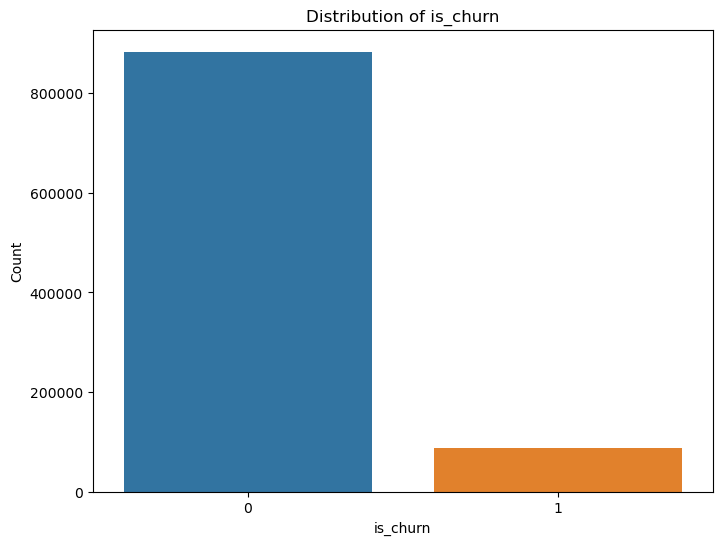

In [319]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of 'is_churn'
plt.figure(figsize=(8, 6))
sns.countplot(x='is_churn', data=train_df)
plt.title('Distribution of is_churn')
plt.xlabel('is_churn')
plt.ylabel('Count')
plt.show()


In [320]:
tnx_df.describe()

,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
count,1.431009e+06,1.431009e+06,1.431009e+06,1.431009e+06,1.431009e+06,1.431009e+06,1.431009e+06,1.431009e+06
mean,3.791835e+01,6.601770e+01,2.817870e+02,2.813172e+02,7.853025e-01,2.016848e+07,2.017110e+07,2.455121e-02
std,4.964805e+00,1.024864e+02,4.351861e+02,4.354200e+02,4.106124e-01,4.858797e+03,3.032367e+03,1.547529e-01
min,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.015010e+07,2.016042e+07,0.000000e+00
25%,3.600000e+01,3.000000e+01,9.900000e+01,9.900000e+01,1.000000e+00,2.017023e+07,2.017041e+07,0.000000e+00
50%,4.000000e+01,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,2.017031e+07,2.017042e+07,0.000000e+00
75%,4.100000e+01,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,2.017032e+07,2.017050e+07,0.000000e+00
max,4.100000e+01,4.500000e+02,2.000000e+03,2.000000e+03,1.000000e+00,2.017033e+07,2.036102e+07,1.000000e+00


In [321]:
user_logs_df.describe()

,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
count,1.839636e+07,1.839636e+07,1.839636e+07,1.839636e+07,1.839636e+07,1.839636e+07,1.839636e+07,1.839636e+07
mean,2.017032e+07,6.191401e+00,1.508789e+00,9.413759e-01,1.079905e+00,3.028246e+01,2.903615e+01,7.904814e+03
std,8.916720e+00,1.342827e+01,3.908539e+00,1.924840e+00,3.518409e+00,4.203641e+01,3.219866e+01,1.013632e+04
min,2.017030e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e-03
25%,2.017031e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,8.000000e+00,1.959944e+03
50%,2.017032e+07,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.700000e+01,1.800000e+01,4.582990e+03
75%,2.017032e+07,7.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,3.700000e+01,3.800000e+01,9.848441e+03
max,2.017033e+07,5.639000e+03,9.120000e+02,5.080000e+02,1.561000e+03,4.110700e+04,4.925000e+03,9.194059e+06


In [322]:
members_df.describe()

,city,bd,registered_via,registration_init_time
count,6.769473e+06,6.769473e+06,6.769473e+06,6.769473e+06
mean,3.847358e+00,9.795794e+00,5.253069e+00,2.014518e+07
std,5.478359e+00,1.792590e+01,2.361398e+00,2.318601e+04
min,1.000000e+00,-7.168000e+03,-1.000000e+00,2.004033e+07
25%,1.000000e+00,0.000000e+00,4.000000e+00,2.014042e+07
50%,1.000000e+00,0.000000e+00,4.000000e+00,2.015101e+07
75%,4.000000e+00,2.100000e+01,7.000000e+00,2.016060e+07
max,2.200000e+01,2.016000e+03,1.900000e+01,2.017043e+07


In [326]:
members_df

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915
...,...,...,...,...,...,...
6769468,VSGkb3hyBRUtb/b1MQUZbvOkktS3vKLnhMHW0CF8eyU=,1,0,NaN,7,20151020
6769469,nWjH7glPkZ7jOVaCRwwjlpmp0T1hSWdv8hMJxiWCwKc=,1,0,NaN,7,20151020
6769470,GH+b5+1tlv7ZZXsA8upBzVXMTLyffKcsF7WoU8b5rOI=,15,26,female,4,20151020
6769471,XVlwT3fdCFGKqerEKBzUIjK+jzI6jzSke4cDMVhYyjE=,1,0,NaN,4,20151020


# 3. Feature engineering

In [5]:
transactions_v2 = tnx_df.groupby('msno', as_index = False).agg({'payment_method_id': lambda x:x.value_counts().index[0],#get mode
                                                                'payment_plan_days': 'max',
                                                                'plan_list_price': 'max',
                                                                'actual_amount_paid': 'max',
                                                                'is_auto_renew': lambda x:x.value_counts().index[0],#get mode
                                                                'transaction_date': 'min',
                                                                'membership_expire_date': 'max',
                                                               'is_cancel': lambda x:x.value_counts().index[0]})#get mode

In [79]:
transactions_v2

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,22,395,1599,1599,0,20161023,20180206,0
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,41,30,99,99,1,20170315,20170415,0
2,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,30,149,149,1,20170228,20170519,0
3,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,41,30,149,149,1,20170326,20170426,0
4,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,41,30,149,149,1,20170315,20170415,0
...,...,...,...,...,...,...,...,...,...
1197045,zzy0oyiTnRTo5Mbg23oKbBkf9eoaS7+eU4V+d14bzfY=,22,195,894,894,0,20161110,20170527,0
1197046,zzy7iqSpfcRq7R4hmKKuhI+CJRs79a6pteqEggpiNO0=,36,30,180,180,0,20170228,20170401,0
1197047,zzyHq6TK2+cBkeGFUHvh12Z7UxFZiSM7dOOSllSBPDw=,29,30,180,180,0,20170311,20170410,0
1197048,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,39,30,149,149,1,20170228,20170524,0


In [6]:
user_logs_v2 = user_logs_df.groupby('msno', as_index = False).agg({
    'date': 'max',
    'num_25': 'sum',
    'num_50': 'sum',
    'num_75': 'sum',
    'num_985': 'sum',
    'num_100': 'sum',
    'num_unq': 'max',
    'total_secs': 'sum'})

In [7]:
user_logs_v2['percent_25'] = user_logs_v2['num_25']/(user_logs_v2['num_25']+user_logs_v2['num_50']+user_logs_v2['num_75']+user_logs_v2['num_985']+user_logs_v2['num_100'])
user_logs_v2['percent_50'] = user_logs_v2['num_50']/(user_logs_v2['num_25']+user_logs_v2['num_50']+user_logs_v2['num_75']+user_logs_v2['num_985']+user_logs_v2['num_100'])
user_logs_v2['percent_100'] = (user_logs_v2['num_985']+user_logs_v2['num_100'])/(user_logs_v2['num_25']+user_logs_v2['num_50']+user_logs_v2['num_75']+user_logs_v2['num_985']+user_logs_v2['num_100'])

In [8]:
user_logs_v3 = user_logs_v2.drop(columns = ['num_25', 'num_50', 'num_75', 'num_985', 'num_100'])

In [9]:
dataset_train = train_df.merge(members_df, on = 'msno', how = 'left').merge(transactions_v2, on = 'msno', how = 'left').merge(user_logs_v3, on = 'msno', how = 'left')

In [10]:
dataset_train['registration_init_time'] = pd.to_datetime(dataset_train['registration_init_time'], format = '%Y%m%d')
dataset_train['transaction_date'] = pd.to_datetime(dataset_train['transaction_date'], format = '%Y%m%d')
dataset_train['membership_expire_date'] = pd.to_datetime(dataset_train['membership_expire_date'], format = '%Y%m%d')
dataset_train['date'] = pd.to_datetime(dataset_train['date'], format = '%Y%m%d')

In [11]:
dataset_train['registration_day'] = (dataset_train['membership_expire_date'].max() - dataset_train['registration_init_time']).dt.days
dataset_train['transaction_day'] = (dataset_train['membership_expire_date'].max() - dataset_train['transaction_date']).dt.days
dataset_train['membership_expire_day'] = (dataset_train['membership_expire_date'].max() - dataset_train['membership_expire_date']).dt.days
dataset_train['last_play_day'] = (dataset_train['membership_expire_date'].max() - dataset_train['date']).dt.days
# create new day columns for modelling purpose

In [12]:
dataset_train_v2 = dataset_train.drop(columns = ['msno', 'gender', 'bd', 'registration_init_time', 'transaction_date', 'membership_expire_date', 'date'])
# remove gender and age since people on kaggle said it is not accuracate

In [76]:
dataset_train_v2

,is_churn,city,registered_via,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel,num_unq,total_secs,percent_25,percent_50,percent_100,registration_day,transaction_day,membership_expire_day,last_play_day
0,1,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,158.0,80598.557,0.338182,0.041818,0.596364,3524.0,NaN,NaN,2332.0
1,1,13.0,3.0,36.0,30.0,180.0,180.0,0.0,0.0,9.0,6986.509,0.000000,0.125000,0.812500,3524.0,2350.0,2319.0,2341.0
2,1,13.0,3.0,17.0,90.0,300.0,300.0,0.0,0.0,82.0,67810.467,0.430631,0.102703,0.409009,3520.0,2350.0,2254.0,2330.0
3,1,1.0,7.0,41.0,30.0,149.0,149.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,3507.0,2931.0,2047.0,NaN
4,1,13.0,7.0,41.0,30.0,99.0,99.0,1.0,0.0,62.0,239882.241,0.009128,0.007099,0.979716,3491.0,2511.0,2159.0,2330.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970955,0,13.0,7.0,40.0,30.0,149.0,149.0,1.0,0.0,70.0,77031.435,0.124352,0.018135,0.847150,4369.0,2357.0,2327.0,2330.0
970956,0,1.0,7.0,41.0,30.0,99.0,99.0,1.0,0.0,26.0,8697.066,0.488636,0.090909,0.329545,4366.0,2351.0,2320.0,2330.0
970957,0,1.0,7.0,41.0,30.0,99.0,99.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,4364.0,2345.0,2314.0,NaN
970958,0,5.0,9.0,39.0,30.0,149.0,149.0,1.0,0.0,35.0,79499.246,0.083544,0.025316,0.875949,4364.0,2361.0,2287.0,2331.0


In [13]:
X = dataset_train_v2.drop(columns=['is_churn'])
y = dataset_train_v2['is_churn']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [16]:
X_train.dtypes

city                     float64
registered_via           float64
payment_method_id        float64
payment_plan_days        float64
plan_list_price          float64
actual_amount_paid       float64
is_auto_renew            float64
is_cancel                float64
num_unq                  float64
total_secs               float64
percent_25               float64
percent_50               float64
percent_100              float64
registration_day         float64
transaction_day          float64
membership_expire_day    float64
last_play_day            float64
dtype: object

In [128]:
X_train['registered_via'].value_counts()


registered_via
7.0     458388
9.0     188342
3.0      85294
4.0      42081
13.0      2663
Name: count, dtype: int64

# 4. Model training

In [155]:
# Define the transformers for each group of columns
cat_cols = ['city', 'registered_via', 'payment_method_id', 'payment_plan_days', 'is_auto_renew', 'is_cancel']
frequency_encoding_cols = ['city','payment_method_id', 'payment_plan_days','registered_via']
num_cols = ['plan_list_price', 'actual_amount_paid', 'num_unq', 'total_secs', 'percent_25', 'percent_50', 'percent_100', 'registration_day', 'transaction_day', 'membership_expire_day', 'last_play_day']

# Define your custom replacement functions
def replacemode(df):
    for i in cat_cols:
        df[i] = df[i].fillna(df[i].value_counts().index[0])
    return df

def replacemean(df):
    for i in num_cols:
        mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
        df[i] = mean_imputer.fit_transform(df[[i]])
    return df

def replaceoutlier(df):
    for i in num_cols:
        mean, std = np.mean(df[i]), np.std(df[i])
        cut_off = std * 3
        lower, upper = mean - cut_off, mean + cut_off
        df[i][df[i] < lower] = lower
        df[i][df[i] > upper] = upper
    return df

def convert_to_str(df):
    for col in cat_cols:
        df[col] = df[col].astype(str)
    return df

def frequency_encode(df):
    for col in frequency_encoding_cols:
        freq_map = df[col].value_counts(normalize=True)
        df[col + '_freq_enc'] = df[col].map(freq_map)
    return df

def one_hot_encode(df):
    for col in one_hot_col:
        pd.get_dummies(df, columns=col, drop_first=True)
    return df

# Function transformers
replacemode_transformer = FunctionTransformer(replacemode)
replacemean_transformer = FunctionTransformer(replacemean)
replace_outlier_transformer = FunctionTransformer(replaceoutlier)
convert_to_str_transformer = FunctionTransformer(convert_to_str)
frequency_encode_transformer = FunctionTransformer(frequency_encode)
one_hot_encode_transformer = FunctionTransformer(one_hot_encode)

# Define the pipeline steps
steps = [
    ('replacemode', replacemode_transformer),  
    ('replacemean', replacemean_transformer),  
    ('replaceoutlier', replace_outlier_transformer),  
    ('convert_to_str', convert_to_str_transformer),  
    ('freq_enc',frequency_encode_transformer),
    ('smote', SMOTE(random_state=42, sampling_strategy='auto')), 
    ('lr', LogisticRegression()) 
]

# Define the pipeline
lr_pipeline = Pipeline(steps=steps)

# Fit your pipeline model
pipeline_model_lr = lr_pipeline.fit(X_train, y_train)

# Predict using the pipeline model
prediction_lr = pipeline_model_lr.predict(X_test)

In [156]:
accuracy = accuracy_score(y_test, prediction_lr)
print(accuracy)

0.746467413693664


In [252]:
# Check for missing values in X_train
missing_values = X_train.isna().sum()

print("Missing values in X_train:")
print(missing_values)


Missing values in X_train:
city                          0
registered_via                0
payment_method_id             0
payment_plan_days             0
plan_list_price               0
actual_amount_paid            0
is_auto_renew                 0
is_cancel                     0
num_unq                       0
total_secs                    0
percent_25                    0
percent_50                    0
percent_100                   0
registration_day              0
transaction_day               0
membership_expire_day         0
last_play_day                 0
city_freq_enc                 0
payment_method_id_freq_enc    0
payment_plan_days_freq_enc    0
registered_via_freq_enc       0
dtype: int64


In [260]:
steps = [
    ('replacemode', replacemode_transformer),  # step 1
    ('replacemean', replacemean_transformer),  # step 2
    ('replaceoutlier', replace_outlier_transformer),  # step 3
    ('convert_to_str', convert_to_str_transformer),  # step 4
    ('freq_enc',frequency_encode_transformer),
    ('smote', SMOTE(random_state=42, sampling_strategy='auto')),  # step 5
    ('dt', DecisionTreeClassifier())  # step 6
]

# Define the pipeline
dt_pipeline = Pipeline(steps=steps)

# Fit your pipeline model
pipeline_model_dt = dt_pipeline.fit(X_train, y_train)

# Predict using the pipeline model
prediction_dt = pipeline_model_dt.predict(X_test)


In [261]:
accuracy_dt = accuracy_score(y_test, prediction_dt)
print(accuracy_dt)

0.8161819230452336


In [262]:
# Get feature importances from the DecisionTreeClassifier
feature_importances = pipeline_model_dt.named_steps['dt'].feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df)


                       Feature  Importance
4              plan_list_price    0.219894
19  payment_plan_days_freq_enc    0.175846
7                    is_cancel    0.167028
5           actual_amount_paid    0.162799
14             transaction_day    0.128014
6                is_auto_renew    0.052406
15       membership_expire_day    0.028353
16               last_play_day    0.013895
13            registration_day    0.011188
9                   total_secs    0.006492
18  payment_method_id_freq_enc    0.005433
11                  percent_50    0.004646
8                      num_unq    0.004489
10                  percent_25    0.004352
12                 percent_100    0.004330
2            payment_method_id    0.003410
17               city_freq_enc    0.002785
0                         city    0.002382
20     registered_via_freq_enc    0.001313
1               registered_via    0.000865
3            payment_plan_days    0.000080


In [259]:
steps = [
    ('replacemode', replacemode_transformer),  # step 1
    ('replacemean', replacemean_transformer),  # step 2
    ('replaceoutlier', replace_outlier_transformer),  # step 3
    ('convert_to_str', convert_to_str_transformer),  # step 4
    ('freq_enc',frequency_encode_transformer),
    ('smote', SMOTE(random_state=42, sampling_strategy='auto')),  # step 5
    ('rf', RandomForestClassifier())  # step 6
]

# Define the pipeline
rf_pipeline = Pipeline(steps=steps)

# Fit your pipeline model
pipeline_model_rf = rf_pipeline.fit(X_train, y_train)

# Predict using the pipeline model
prediction_rf = pipeline_model_rf.predict(X_test)


In [263]:
accuracy_rf = accuracy_score(y_test, prediction_rf)
print(accuracy_rf)

0.31705734530773666


In [264]:
# Get feature importances from the RandomForestClassifier
feature_importances = pipeline_model_rf.named_steps['rf'].feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df)


                       Feature  Importance
4              plan_list_price    0.128304
14             transaction_day    0.114287
5           actual_amount_paid    0.107718
7                    is_cancel    0.107104
15       membership_expire_day    0.106303
18  payment_method_id_freq_enc    0.067236
20     registered_via_freq_enc    0.059962
19  payment_plan_days_freq_enc    0.050913
6                is_auto_renew    0.050362
16               last_play_day    0.044625
3            payment_plan_days    0.030353
2            payment_method_id    0.028027
17               city_freq_enc    0.021692
0                         city    0.015613
13            registration_day    0.014383
1               registered_via    0.013108
9                   total_secs    0.009727
11                  percent_50    0.007915
10                  percent_25    0.007805
8                      num_unq    0.007635
12                 percent_100    0.006927


In [266]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from scikeras.wrappers import KerasClassifier
def create_nn_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(16, activation='relu'),
        Dropout(0.5),
        Dense(8, activation='relu'),
        Dropout(0.5),
        Dense(4, activation='relu'),
        Dropout(0.5),
        Dense(2, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

clf = KerasClassifier(build_fn=create_nn_model,input_dim=21,verbose=0)#deprecated

steps = [
    ('replacemode', replacemode_transformer),  # step 1
    ('replacemean', replacemean_transformer),  # step 2
    ('replaceoutlier', replace_outlier_transformer),  # step 3
    ('convert_to_str', convert_to_str_transformer),  # step 4
    ('freq_enc',frequency_encode_transformer),
    ('smote', SMOTE(random_state=42, sampling_strategy='auto')),  # step 5
     ('clf', clf)  # step 6
]



dl_pipeline = Pipeline(steps=steps)

# Fit your pipeline model
pipeline_model_dl = dl_pipeline.fit(X_train, y_train)

# Predict using the pipeline model
prediction_dl = pipeline_model_dl.predict(X_test)


In [267]:
accuracy_dl = accuracy_score(y_test, prediction_dl)
print(accuracy_dl)

0.08985952047458186


In [ ]:
#parm tune for dt and rf

In [268]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, log_loss

# Define the hyperparameters to tune
param_grid = {
    'dt__max_depth': [10,20,30]
    # Add other hyperparameters to tune if needed
}

# Perform Grid Search with cross-validation
log_loss_scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)
grid_search = GridSearchCV(estimator=dt_pipeline, param_grid=param_grid, cv=5, scoring=log_loss_scorer)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params_dt = grid_search.best_params_
print("Best hyperparameters:", best_params_dt)

# Refit the pipeline with the best hyperparameters
best_pipeline_model = grid_search.best_estimator_
best_pipeline_model.fit(X_train, y_train)

# Predict using the best pipeline model
best_prediction = best_pipeline_model.predict(X_test)


Best hyperparameters: {'dt__max_depth': 10}


In [270]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for Logistic Regression
param_grid = {
    'lr__penalty': ['l1', 'l2'],
    'lr__C': [0.001, 0.01],
    # Add more hyperparameters for logistic regression if needed
}

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(lr_pipeline, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to your training data
grid_search_lr.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search_lr.best_params_
best_score = grid_search_lr.best_score_

# Use the best model for prediction
best_model = grid_search_lr.best_estimator_
prediction_lr = grid_search_lr.predict(X_test)


In [272]:
print("Best hyperparameters:", best_params)
print("Best best_score:", best_score)

Best hyperparameters: {'lr__C': 0.001, 'lr__penalty': 'l2'}
Best best_score: 0.7708569461780383


In [274]:
import lightgbm as lgb
from sklearn.ensemble import StackingClassifier

# Define the final estimator
lgb_estimator = lgb.LGBMClassifier()

# Create the stacking classifier with RandomForest and DecisionTree as base estimators
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', grid_search),  # RandomForestClassifier
        ('lr', grid_search_lr)  # DecisionTreeClassifier
    ],
    final_estimator=lgb_estimator
)

# Fit the stacking classifier
stacking_clf.fit(X_train, y_train)

# Predict using the stacking classifier
prediction_stacked = stacking_clf.predict(X_test)


[LightGBM] [Info] Number of positive: 69880, number of negative: 706888
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006332 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 776768, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.089963 -> initscore=-2.314093
[LightGBM] [Info] Start training from score -2.314093


In [323]:
acc = accuracy_score(y_test, prediction_stacked)
print("Accuracy:", acc)

Accuracy: 0.9276386256900387


# 5. model interpretation

In [325]:
perm = PermutationImportance(stacking_clf, random_state=42).fit(X_test, y_test)

# Show the feature importances
eli5.show_weights(perm, feature_names=X_train.columns.tolist())

Weight,Feature
0.0211 ± 0.0002,payment_plan_days
0.0016 ± 0.0002,total_secs
0.0012 ± 0.0001,transaction_day
0.0012 ± 0.0001,num_unq
0.0010 ± 0.0001,membership_expire_day
0.0010 ± 0.0002,plan_list_price
0.0008 ± 0.0004,registration_day
0.0003 ± 0.0000,last_play_day
0.0001 ± 0.0001,actual_amount_paid
0.0000 ± 0.0001,city


Decile 1 Lift: 4.3829153784495585, Gain: 0.4382915378449559
Decile 2 Lift: 1.8758731249284322, Gain: 0.6258788503377991
Decile 3 Lift: 1.0549639299209892, Gain: 0.7313752433298981
Decile 4 Lift: 0.8024733768464445, Gain: 0.8116225810145425
Decile 5 Lift: 0.5650979045001717, Gain: 0.8681323714645597
Decile 6 Lift: 0.37570136264742926, Gain: 0.9057025077293026
Decile 7 Lift: 0.25592579869460663, Gain: 0.9312950875987633
Decile 8 Lift: 0.23966563609298064, Gain: 0.9552616512080614
Decile 9 Lift: 0.23073399748081985, Gain: 0.9783350509561434
Decile 10 Lift: 0.21664949043856638, Gain: 1.0


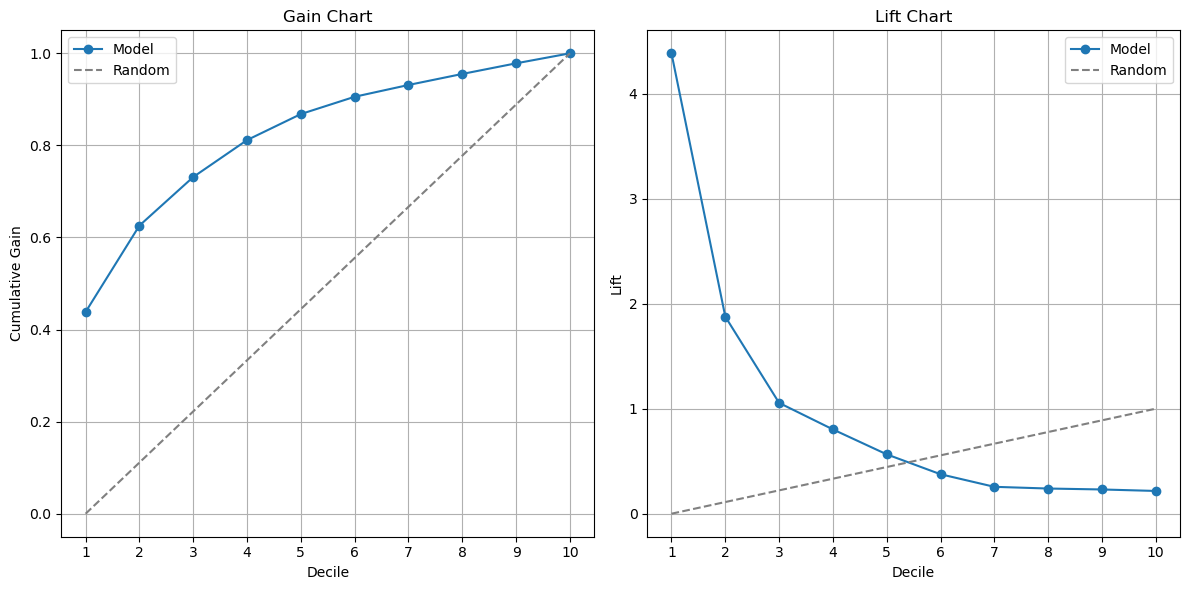

In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have predictions and actual labels
predicted_proba = stacking_clf.predict_proba(X)[:, 1]  # Predicted probabilities
actual_churn = y  # Actual churn labels (1 for churn, 0 for non-churn)

# Combine predictions and actual labels into a DataFrame
results = pd.DataFrame({'predicted_proba': predicted_proba, 'actual_churn': actual_churn})

# Sort by predicted probabilities
results = results.sort_values(by='predicted_proba', ascending=False)

# Split data into deciles
deciles = np.array_split(results, 10)

# Calculate average churn rate
average_churn_rate = results['actual_churn'].mean()

# Calculate lift and gain
total_churners = results['actual_churn'].sum()
cumulative_churners = 0
gains = []
lifts = []

for i, decile in enumerate(deciles):
    decile_churners = decile['actual_churn'].sum()
    cumulative_churners += decile_churners
    cumulative_gain = cumulative_churners / total_churners
    gains.append(cumulative_gain)
    lift = (decile_churners / len(decile)) / average_churn_rate
    lifts.append(lift)
    print(f'Decile {i+1} Lift: {lift}, Gain: {cumulative_gain}')

# Generate random line for comparison
random_line = np.linspace(0, 1, 10)  # Create a line from 0 to 1 with 10 points

# Plot the gain chart
decile_indices = range(1, 11)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(decile_indices, gains, marker='o', linestyle='-', label='Model')
plt.plot(decile_indices, random_line, linestyle='--', color='gray', label='Random')
plt.xlabel('Decile')
plt.ylabel('Cumulative Gain')
plt.title('Gain Chart')
plt.xticks(decile_indices)
plt.legend()
plt.grid(True)

# Plot the lift chart
plt.subplot(1, 2, 2)
plt.plot(decile_indices, lifts, marker='o', linestyle='-', label='Model')
plt.plot(decile_indices, random_line, linestyle='--', color='gray', label='Random')
plt.xlabel('Decile')
plt.ylabel('Lift')
plt.title('Lift Chart')
plt.xticks(decile_indices)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [330]:
# Get predicted probabilities
y_proba = stacking_clf.predict_proba(X_train)[:, 1]

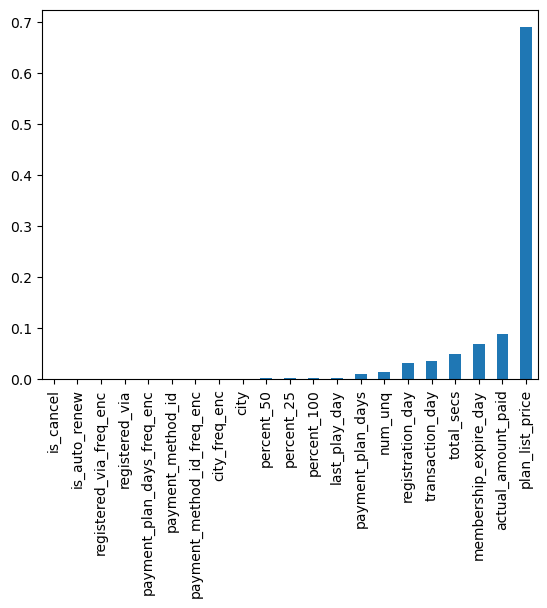

In [331]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

dt.fit(X_train, y_proba)

pd.Series(dt.feature_importances_, index=X.columns).sort_values().plot(kind='bar');


In [ ]:
#the end

In [283]:
X_train_numeric.dtypes


city                          float64
registered_via                float64
payment_method_id             float64
payment_plan_days             float64
plan_list_price               float64
actual_amount_paid            float64
is_auto_renew                 float64
is_cancel                     float64
num_unq                       float64
total_secs                    float64
percent_25                    float64
percent_50                    float64
percent_100                   float64
registration_day              float64
transaction_day               float64
membership_expire_day         float64
last_play_day                 float64
city_freq_enc                 float64
payment_method_id_freq_enc    float64
payment_plan_days_freq_enc    float64
registered_via_freq_enc       float64
dtype: object

In [305]:
X_train_numeric.shape


(776768, 21)

In [304]:
y_train_numeric.shape

(776768,)

In [311]:
X_res.dtypes

city                          float64
registered_via                float64
payment_method_id             float64
payment_plan_days             float64
plan_list_price               float64
actual_amount_paid            float64
is_auto_renew                 float64
is_cancel                     float64
num_unq                       float64
total_secs                    float64
percent_25                    float64
percent_50                    float64
percent_100                   float64
registration_day              float64
transaction_day               float64
membership_expire_day         float64
last_play_day                 float64
city_freq_enc                 float64
payment_method_id_freq_enc    float64
payment_plan_days_freq_enc    float64
registered_via_freq_enc       float64
dtype: object

In [307]:
X_res = pd.DataFrame(X_train_numeric, columns = X_train.columns.to_list())

In [312]:
X_res

,city,registered_via,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel,num_unq,total_secs,...,percent_50,percent_100,registration_day,transaction_day,membership_expire_day,last_play_day,city_freq_enc,payment_method_id_freq_enc,payment_plan_days_freq_enc,registered_via_freq_enc
634651,1.0,7.0,41.0,30.0,99.0,99.0,1.0,0.0,65.090441,139743.681334,...,0.048188,0.736199,3624.115099,2355.0,2324.0,2332.704985,0.569326,0.596515,0.980769,0.590122
78621,1.0,7.0,41.0,30.0,129.0,129.0,1.0,0.0,65.090441,139743.681334,...,0.048188,0.736199,4565.000000,2330.0,2300.0,2332.704985,0.569326,0.596515,0.980769,0.590122
406440,1.0,7.0,41.0,30.0,99.0,99.0,1.0,0.0,128.000000,162795.862000,...,0.027603,0.492114,3741.000000,2330.0,2300.0,2330.000000,0.569326,0.596515,0.980769,0.590122
647529,1.0,9.0,30.0,30.0,100.0,100.0,1.0,0.0,91.000000,240174.352000,...,0.020488,0.887805,2656.000000,2360.0,2330.0,2330.000000,0.569326,0.016746,0.980769,0.242469
517204,1.0,7.0,41.0,30.0,149.0,149.0,1.0,0.0,65.090441,139743.681334,...,0.048188,0.736199,3815.000000,2355.0,2324.0,2332.704985,0.569326,0.596515,0.980769,0.590122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,6.0,9.0,34.0,30.0,149.0,149.0,1.0,0.0,16.000000,18775.708000,...,0.010638,0.851064,6699.943268,2361.0,2270.0,2334.000000,0.027047,0.029596,0.980769,0.242469
365838,5.0,7.0,41.0,30.0,149.0,149.0,1.0,0.0,35.000000,38938.866000,...,0.028846,0.716346,4997.000000,2351.0,2319.0,2330.000000,0.072685,0.596515,0.980769,0.590122
131932,13.0,9.0,29.0,30.0,180.0,180.0,1.0,0.0,69.000000,153454.063000,...,0.055495,0.632209,4482.000000,2346.0,2315.0,2330.000000,0.099865,0.015857,0.980769,0.242469
671155,1.0,7.0,41.0,30.0,99.0,99.0,1.0,0.0,22.000000,3855.666000,...,0.141761,0.333333,4408.000000,2349.0,2318.0,2341.912489,0.569326,0.596515,0.980769,0.590122


In [ ]:
# explainer_lime = LimeTabularExplainer(X_res.values, feature_names = X_res.columns.values, class_names = ['not churn', 'churn'])
# # pick a passenger we want to analyze
# index = 78621
# # get the explanation for the black box model
# exp = explainer_lime.explain_instance(X_test.iloc[index], stacking_clf.predict_proba)
# # display explanation
# exp.show_in_notebook()

In [ ]:
# from lime.lime_tabular import LimeTabularExplainer

# explainer = LimeTabularExplainer(X_train_numeric.values,
#                                  feature_names=X_train_numeric.columns.values,
#                                  class_names=['not churn', 'churn'])

# # Pick a passenger we want to analyze
# id = 78621

# # Get the explanation from the black box model
# exp = explainer.explain_instance(y_train_numeric.iloc[id], stacking_clf.predict_proba)

# # Display the explanation
# exp.show_in_notebook()

In [ ]:
# import shap
# shap.initjs()

# explainer = shap.KernelExplainer(stacking_clf.predict_proba, X_train, link='logit')
# shap_values = explainer.shap_values(X_test.as_matrix(), nsamples=100)

# shap.force_plot(explainer.expected_value[0], shap_values[0][0, :], X_test.iloc[0, :], link='logit')